<h3>1.3</h3

In [12]:
import pandas as pd
from bs4 import BeautifulSoup
import requests

In [13]:
# found constituents on wikipedia, so will scrape the data from the website
url = "https://en.wikipedia.org/wiki/Dow_Jones_Industrial_Average"
response = requests.get(url)
content = response.content

In [14]:
# setting a soup to parse html content on page
soup = BeautifulSoup(content, "html.parser")

In [15]:
# finding the constituents table after using developer mode to identify id html label
constituents_html = soup.find("table", attrs = {"id": "constituents"})

In [16]:
data = []

# find row in table

for row in constituents_html.find_all("tr"):
    
    row_data = []
    
    # find each cell in row
    
    for cell in row.find_all("td"):
        
        row_data.append(cell.text)
    
    # append the cells to one entry in the array: this constitutes of 1 ticker
    
    data.append(row_data)
    
constituents = pd.DataFrame(data)
print(constituents.head())

          0       1                     2             3  \
0      None    None                  None          None   
1    NYSE\n   MMM\n        Conglomerate\n  1976-08-09\n   
2    NYSE\n   AXP\n  Financial services\n  1982-08-30\n   
3  NASDAQ\n  AMGN\n   Biopharmaceutical\n  2020-08-31\n   
4  NASDAQ\n  AMZN\n           Retailing\n  2024-02-26\n   

                                         4        5  
0                                     None     None  
1  As Minnesota Mining and Manufacturing\n  1.84%\n  
2                                       \n  4.06%\n  
3                                       \n  4.01%\n  
4                                       \n  2.87%\n  


In [17]:
constituents[2].unique()

array([None, 'Conglomerate\n', 'Financial services\n',
       'Biopharmaceutical\n', 'Retailing\n', 'Information technology\n',
       'Aerospace and defense\n', 'Construction and mining\n',
       'Petroleum industry\n', 'Drink industry\n',
       'Broadcasting and entertainment\n', 'Home Improvement\n',
       'Pharmaceutical industry\n', 'Food industry\n',
       'Clothing industry\n', 'Fast-moving consumer goods\n',
       'Speciality chemicals\n', 'Insurance\n', 'Managed health care\n',
       'Telecommunications industry\n'], dtype=object)

In [18]:
constituents.replace("\n", "", regex = True, inplace = True) # dropping \n from the rows
constituents.drop(index = 0, axis = 0, inplace = True) # dropping None from first row
constituents.columns = ["Exchange", "Symbol", "Industry", "Date Added", "Notes", "Index Weighting"]#renaming columns
constituents_tickers = constituents["Symbol"].values # selecting the values from the column

In [19]:
print(constituents_tickers)

['MMM' 'AXP' 'AMGN' 'AMZN' 'AAPL' 'BA' 'CAT' 'CVX' 'CSCO' 'KO' 'DIS' 'GS'
 'HD' 'HON' 'IBM' 'JNJ' 'JPM' 'MCD' 'MRK' 'MSFT' 'NKE' 'NVDA' 'PG' 'CRM'
 'SHW' 'TRV' 'UNH' 'VZ' 'V' 'WMT']


In [20]:
import yfinance as yf

In [21]:
print(help(yf))

Help on package yfinance:

NAME
    yfinance

DESCRIPTION
    # -*- coding: utf-8 -*-
    #
    # yfinance - market data downloader
    # https://github.com/ranaroussi/yfinance
    #
    # Copyright 2017-2019 Ran Aroussi
    #
    # Licensed under the Apache License, Version 2.0 (the "License");
    # you may not use this file except in compliance with the License.
    # You may obtain a copy of the License at
    #
    #     http://www.apache.org/licenses/LICENSE-2.0
    #
    # Unless required by applicable law or agreed to in writing, software
    # distributed under the License is distributed on an "AS IS" BASIS,
    # WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
    # See the License for the specific language governing permissions and
    # limitations under the License.
    #

PACKAGE CONTENTS
    base
    cache
    const
    data
    exceptions
    multi
    scrapers (package)
    shared
    ticker
    tickers
    utils
    version

CLASSES
    builti

In [22]:
ticker_data = yf.download([x for x in constituents_tickers], 
                          start = "2023-12-04", end = "2024-12-04", interval = "1d")["Adj Close"]

[*********************100%%**********************]  30 of 30 completed


In [23]:
ticker_data

Ticker,AAPL,AMGN,AMZN,AXP,BA,CAT,CRM,CSCO,CVX,DIS,...,MSFT,NKE,NVDA,PG,SHW,TRV,UNH,V,VZ,WMT
Date,,,,,,,,,,,,,,,,,,,,,
2023-12-04,188.506500,264.546539,144.839996,171.200089,234.869995,250.728622,249.552155,46.535252,138.886612,91.289940,...,366.400116,113.208054,45.496231,148.366364,279.120911,179.683655,541.898499,252.509903,35.663536,50.748272
2023-12-05,192.477051,262.925507,146.880005,168.660461,234.160004,251.161682,249.910568,46.419037,136.959625,90.079491,...,369.755005,113.463684,46.556011,143.195099,280.648132,180.144653,543.855469,252.678604,36.019794,51.218582
2023-12-06,191.382431,261.450104,144.520004,165.527985,236.889999,251.929367,248.028915,46.196289,136.643265,90.783928,...,366.062622,114.151878,45.493237,143.087769,284.327301,179.624802,543.133972,252.361038,36.094799,50.662762
2023-12-07,193.322906,263.352539,146.880005,166.624847,237.330002,253.346634,247.750153,46.738636,136.537796,91.627281,...,368.196655,112.873787,46.586002,142.941422,289.156830,179.407837,541.888672,253.879456,36.235428,50.329338
2023-12-08,194.755890,261.226807,147.419998,166.437088,244.699997,255.403610,249.701492,46.854855,138.349747,92.393745,...,371.452332,113.955254,47.495808,141.624207,287.411469,178.766769,543.371155,253.800049,35.860416,49.801155
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-11-26,235.059998,280.010010,207.860001,305.570007,150.759995,407.829987,343.179993,59.590000,162.529999,115.449997,...,427.989990,77.215889,136.919998,179.309998,396.140015,263.769989,606.789978,311.820007,44.369999,91.309998
2024-11-27,234.929993,280.070007,205.740005,304.250000,152.399994,403.700012,330.010010,59.290001,162.110001,117.599998,...,422.989990,77.942177,135.339996,179.360001,393.959991,266.660004,608.380005,314.700012,44.380001,91.879997
2024-11-29,237.330002,282.869995,207.889999,304.679993,155.440002,406.109985,329.989990,59.209999,161.929993,117.470001,...,423.459991,78.369995,138.250000,179.259995,397.399994,266.040009,610.200012,315.079987,44.340000,92.500000


In [28]:
ticker_returns = ticker_data.pct_change()

In [29]:
ticker_returns

Ticker,AAPL,AMGN,AMZN,AXP,BA,CAT,CRM,CSCO,CVX,DIS,...,MSFT,NKE,NVDA,PG,SHW,TRV,UNH,V,VZ,WMT
Date,,,,,,,,,,,,,,,,,,,,,
2023-12-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-12-05,0.021063,-0.006128,0.014085,-0.014834,-0.003023,0.001727,0.001436,-0.002497,-0.013875,-0.013259,...,0.009156,0.002258,0.023294,-0.034855,0.005472,0.002566,0.003611,0.000668,0.009989,0.009268
2023-12-06,-0.005687,-0.005611,-0.016068,-0.018573,0.011659,0.003057,-0.007529,-0.004799,-0.002310,0.007820,...,-0.009986,0.006065,-0.022828,-0.000750,0.013110,-0.002886,-0.001327,-0.001257,0.002082,-0.010852
2023-12-07,0.010139,0.007276,0.016330,0.006626,0.001857,0.005626,-0.001124,0.011740,-0.000772,0.009290,...,0.005830,-0.011196,0.024020,-0.001023,0.016986,-0.001208,-0.002293,0.006017,0.003896,-0.006581
2023-12-08,0.007412,-0.008072,0.003676,-0.001127,0.031054,0.008119,0.007876,0.002487,0.013271,0.008365,...,0.008842,0.009581,0.019530,-0.009215,-0.006036,-0.003573,0.002736,-0.000313,-0.010349,-0.010495
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-11-26,0.009404,-0.047585,0.031819,0.001180,-0.015284,0.005374,0.012002,0.014471,0.013532,-0.004741,...,0.021968,-0.020818,0.006617,0.010824,-0.008931,0.009762,0.001585,-0.004374,0.008868,0.020223
2024-11-27,-0.000553,0.000214,-0.010199,-0.004320,0.010878,-0.010127,-0.038376,-0.005034,-0.002584,0.018623,...,-0.011683,0.009406,-0.011540,0.000279,-0.005503,0.010957,0.002620,0.009236,0.000225,0.006242
2024-11-29,0.010216,0.009997,0.010450,0.001413,0.019948,0.005970,-0.000061,-0.001349,-0.001110,-0.001105,...,0.001111,0.005489,0.021501,-0.000558,0.008732,-0.002325,0.002992,0.001207,-0.000901,0.006748


In [30]:
corr_matrix = ticker_returns.corr()

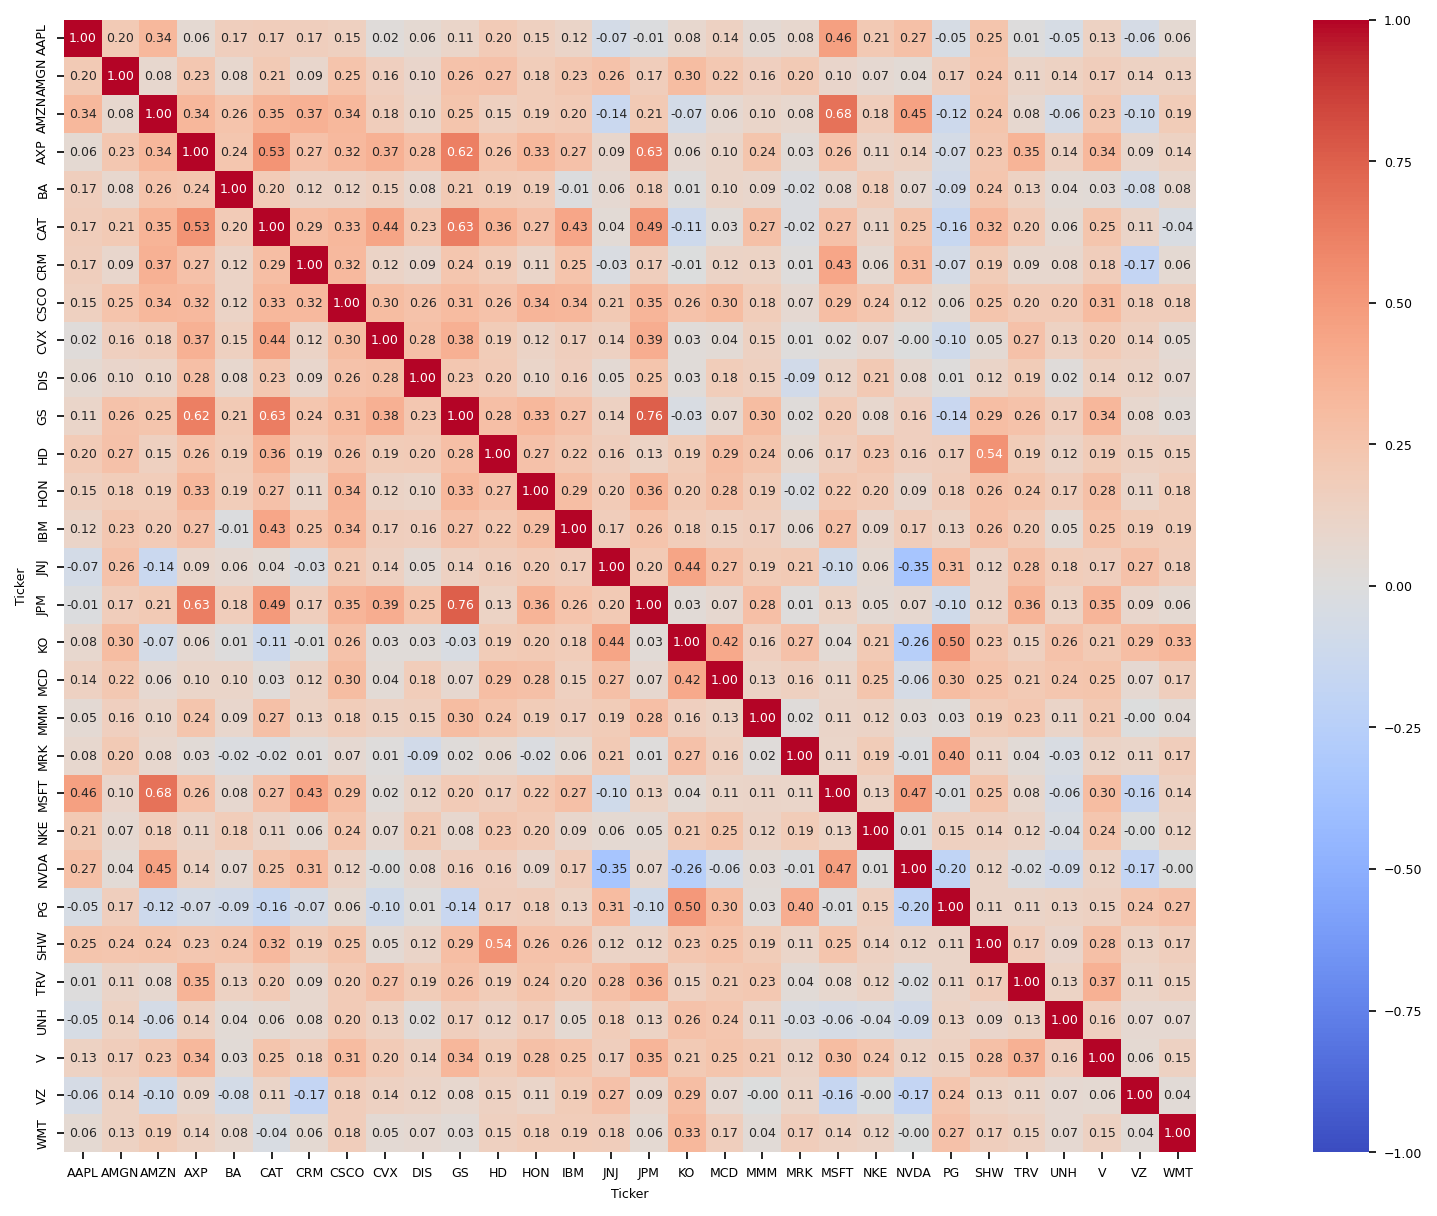

In [33]:
import seaborn as sns
import matplotlib.pyplot as plt
# create matplotlib figure and set font size

plt.rcParams["font.size"] = 6
plt.figure(figsize=(20, 10),
          dpi = 150)
#sns.set(font_scale = 1)

# heatmap using sns, using coolwarm as the color map and rounding values to the nearest hundredth
sns.heatmap(corr_matrix,
            annot = True,
            cmap = 'coolwarm',
            vmin = -1,
            vmax = 1,
            square = True,
            fmt = ".2f")

plt.show()

In [35]:
from sklearn.decomposition import PCA

In [36]:
pca = PCA()
pca.fit(corr_matrix)

PCA()

In [37]:
components = pca.components_

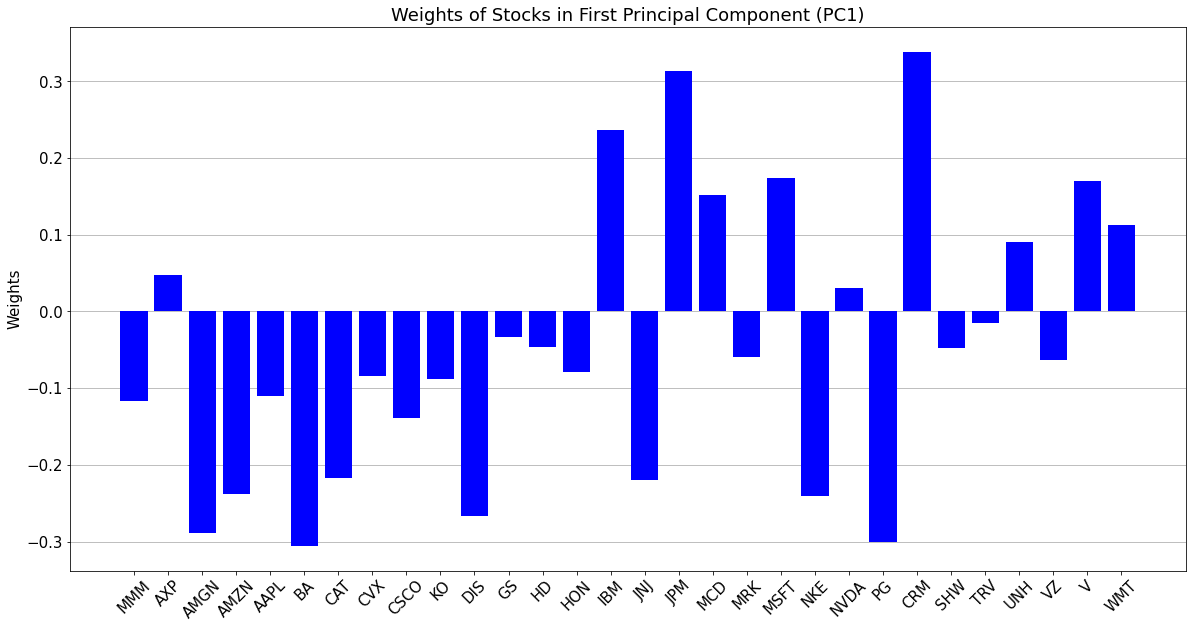

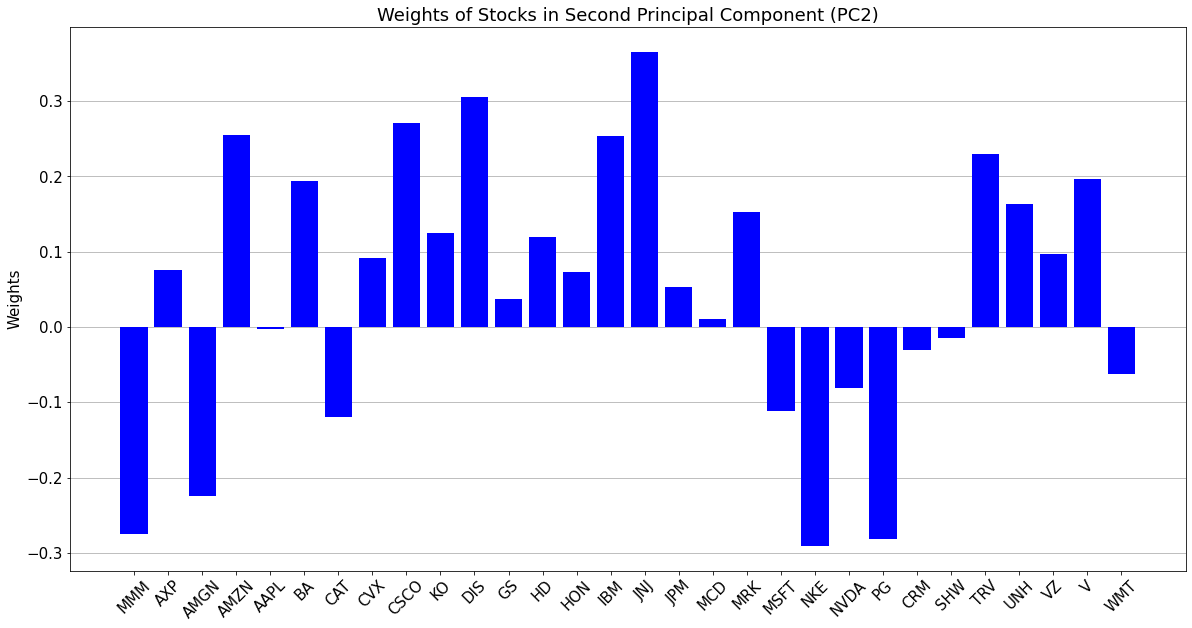

In [38]:
# Plot the weights for the first principal component
plt.rcParams["font.size"] = 15
plt.figure(figsize = (20, 10))

plt.bar(range(len(constituents_tickers)), components[0],
        tick_label = constituents_tickers,
        color = "blue",
       zorder = 3)

plt.title('Weights of Stocks in First Principal Component (PC1)')
plt.ylabel('Weights')
plt.xticks(rotation = 45)
plt.grid(True, zorder = 0, axis = "y")

plt.show()

# Plot the weights for the second principal component
plt.rcParams["font.size"] = 15
plt.figure(figsize = (20, 10))

plt.bar(range(len(constituents_tickers)), components[1],
        tick_label = constituents_tickers,
        color = "blue",
       zorder = 3)

plt.title('Weights of Stocks in Second Principal Component (PC2)')
plt.ylabel('Weights')
plt.xticks(rotation = 45)
plt.grid(True, zorder = 0, axis = "y")

plt.show()

In [40]:
constituents.replace("%", "", regex = True, inplace = True)
constituents["Index Weighting"] = constituents["Index Weighting"].apply(pd.to_numeric)
constituents["Index Weighting"] = constituents["Index Weighting"] * 1e-2

In [41]:
constituents_actual_weights = constituents["Index Weighting"].values

In [42]:
pca1, pca2 = components[0], components[1]

In [43]:
comparison_df = pd.DataFrame(data = [constituents_actual_weights, pca1, pca2]).T

In [44]:
comparison_df.columns = ["Actual Weight", "PCA 1", "PCA 2"]

In [45]:
print(comparison_df.head())

   Actual Weight     PCA 1     PCA 2
0         0.0184 -0.117190 -0.274932
1         0.0406  0.047048  0.075503
2         0.0401 -0.288200 -0.224539
3         0.0287 -0.237333  0.254608
4         0.0318 -0.109743 -0.002203


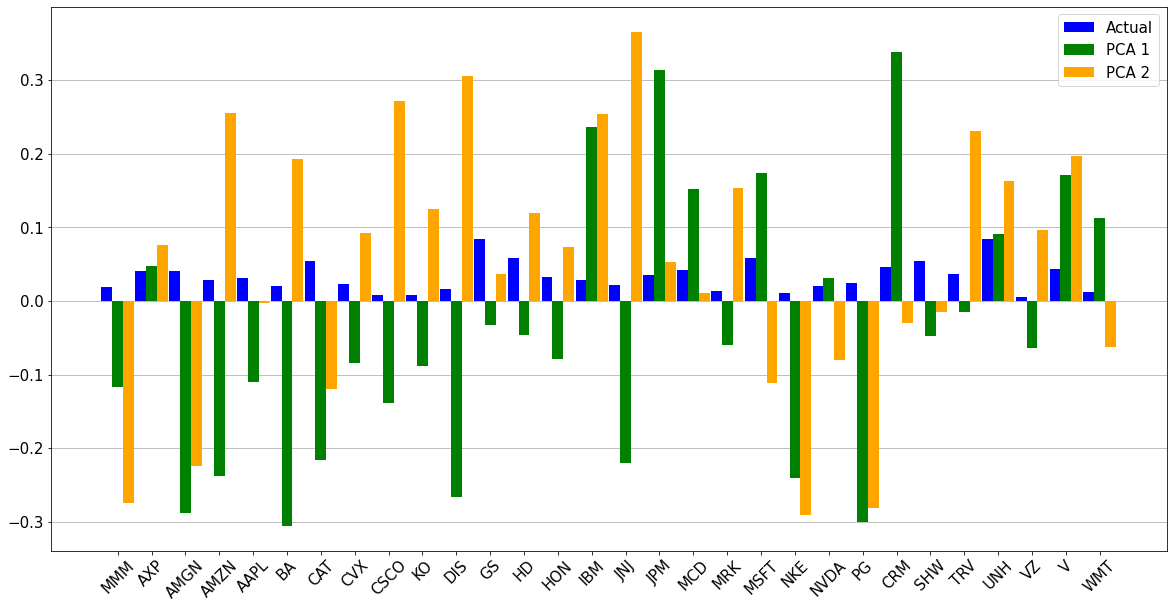

In [46]:
import numpy as np

x_axis = np.arange(len(constituents_tickers))
width = 0.32

plt.rcParams["font.size"] = 15
plt.figure(figsize=(20, 10))

plt.bar(x_axis - width, comparison_df["Actual Weight"], width,
        label = "Actual",
        color = "blue",
        zorder = 3)

plt.bar(x_axis, comparison_df["PCA 1"], width,
        label = "PCA 1",
        color = "green",
       zorder = 3)

plt.bar(x_axis + width, comparison_df["PCA 2"], width,
        label = "PCA 2",
        color = "orange",
       zorder = 3)

plt.legend()
plt.xticks(x_axis, constituents_tickers, rotation = 45)
plt.grid(True, zorder = 0, axis = "y")

plt.show()

<h3>1.4</h3>

In [47]:
explained_variance = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance)

In [48]:
print(cumulative_variance)

[0.33301916 0.51586193 0.5846807  0.63373066 0.6784127  0.71686271
 0.75311458 0.78146023 0.80872975 0.83182905 0.85223419 0.87150054
 0.89009592 0.90537941 0.91929577 0.93029395 0.94082249 0.9496904
 0.95841076 0.96641794 0.9734474  0.97977676 0.98471243 0.98921688
 0.99295597 0.99552955 0.99764357 0.99907158 1.         1.        ]


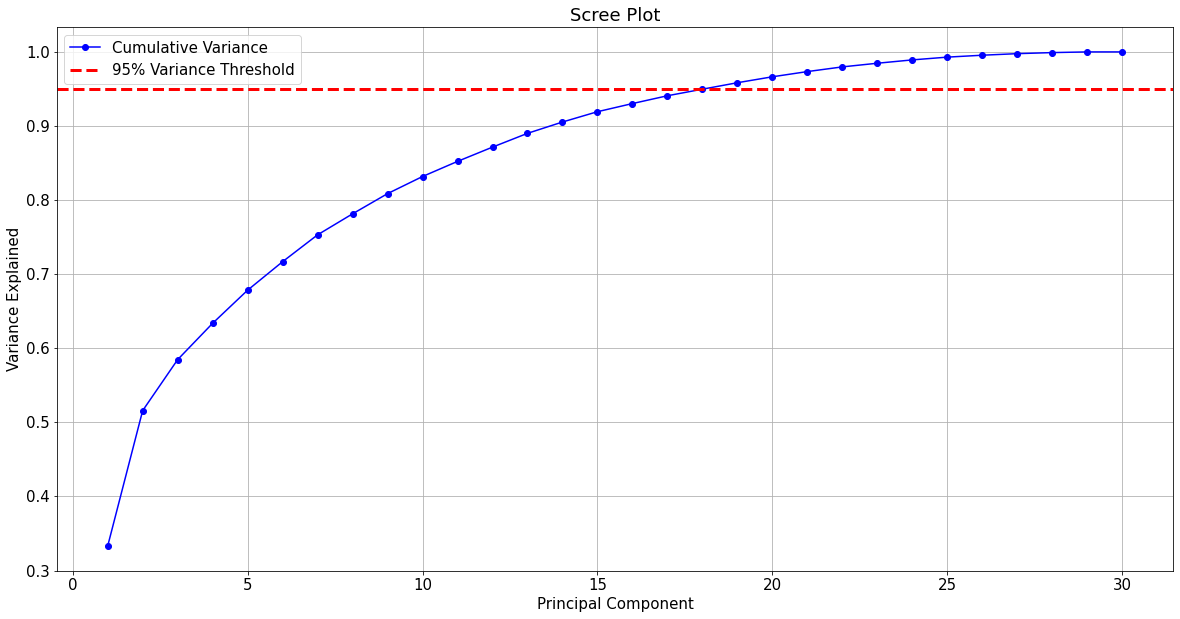

Number of components required to explain 95% of variance: 19


In [55]:
plt.figure(figsize=(20, 10))

plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance,
         marker='o',
         label='Cumulative Variance',
        color = "blue")

plt.axhline(y = 0.95, color='red', linestyle='--',
            linewidth = 3,
            label='95% Variance Threshold')

plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')
plt.legend()
plt.grid(True)
plt.show()

# Find the number of components to explain 95% variance
num_components = np.argmax(cumulative_variance >= 0.95) + 1
print(f"Number of components required to explain 95% of variance: {num_components}")

<h3>1.5</h3>

In [56]:
average_point = [np.mean(pca1), np.mean(pca2)]

In [57]:
euclidean_distances = np.sqrt((pca1 - average_point[0])**2 + (pca2 - average_point[1])**2)

In [58]:
most_distant_indices = np.argsort(euclidean_distances)[-3:]

In [59]:
most_distant_stocks = [constituents_tickers[i] for i in most_distant_indices]

In [60]:
print("Three most distant stocks:", most_distant_stocks)

Three most distant stocks: ['CRM', 'NKE', 'PG']


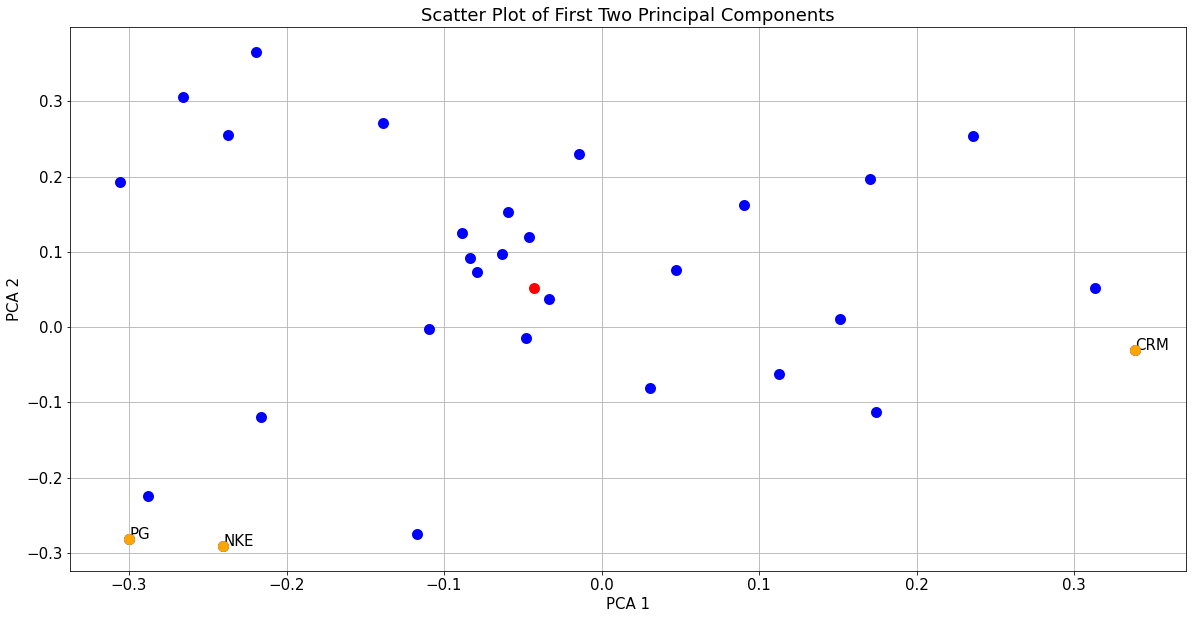

In [61]:
plt.rcParams["font.size"] = 15
plt.figure(figsize=(20, 10))

plt.scatter(pca1, pca2, label='Stocks', color = "blue", zorder = 5, linewidth = 5)

plt.scatter(average_point[0], average_point[1],
            color='red',
            label='Average Point',
            zorder=5,
           linewidths = 5)

plt.scatter(pca1[most_distant_indices], pca2[most_distant_indices], 
            color='orange',
            label='Most Distant Stocks',
            zorder = 5,
           linewidths = 5)

for i in most_distant_indices:
    plt.annotate(constituents_tickers[i], (pca1[i], pca2[i]),
                 fontsize = 15)

plt.title('Scatter Plot of First Two Principal Components')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')

plt.grid(True)
plt.show()

<h3>2.3</h3>

In [62]:
pairwise_distances = np.sqrt(2 * (1 - corr_matrix))

# Convert to a DataFrame for better visualization
distance_matrix = pd.DataFrame(pairwise_distances, index=constituents_tickers, columns=constituents_tickers)

# Display the pairwise distance matrix
distance_matrix

,MMM,AXP,AMGN,AMZN,AAPL,BA,CAT,CVX,CSCO,KO,...,NKE,NVDA,PG,CRM,SHW,TRV,UNH,VZ,V,WMT
MMM,0.000000,1.230985,1.296180,1.338159,1.377791,1.346874,1.204517,1.306765,1.278861,1.296887,...,1.327217,1.389470,1.393617,1.318064,1.273879,1.244873,1.334161,1.415127,1.253396,1.388613
AXP,1.230985,0.000000,1.239076,1.147075,1.373478,1.233284,0.971265,1.121802,1.165200,1.368494,...,1.334595,1.311952,1.462338,1.210190,1.237944,1.137323,1.309905,1.347216,1.153083,1.314080
AMGN,1.296180,1.239076,0.000000,1.354004,1.262060,1.353669,1.258465,1.295849,1.223531,1.181553,...,1.363790,1.384619,1.287104,1.347691,1.235788,1.333743,1.312843,1.314534,1.285332,1.316363
AMZN,1.338159,1.147075,1.354004,0.000000,1.152880,1.220229,1.136727,1.284247,1.152942,1.464198,...,1.283510,1.045139,1.494320,1.123950,1.230979,1.358797,1.458710,1.482456,1.237591,1.274219
AAPL,1.377791,1.373478,1.262060,1.152880,0.000000,1.288581,1.284662,1.398101,1.303077,1.355357,...,1.255822,1.204603,1.448876,1.291991,1.227304,1.409536,1.449042,1.454316,1.315759,1.371987
BA,1.346874,1.233284,1.353669,1.220229,1.288581,0.000000,1.266355,1.303015,1.326234,1.410351,...,1.277088,1.366042,1.474899,1.324145,1.235338,1.315987,1.383903,1.467572,1.391390,1.357010
CAT,1.204517,0.971265,1.258465,1.136727,1.284662,1.266355,0.000000,1.059250,1.156531,1.493004,...,1.330579,1.227465,1.519952,1.188418,1.163025,1.263892,1.369423,1.332520,1.228358,1.440123
CVX,1.306765,1.121802,1.295849,1.284247,1.398101,1.303015,1.059250,0.000000,1.180772,1.393220,...,1.364655,1.414761,1.482227,1.325938,1.376361,1.211380,1.315482,1.308425,1.263274,1.375082
CSCO,1.278861,1.165200,1.223531,1.152942,1.303077,1.326234,1.156531,1.180772,0.000000,1.217766,...,1.231395,1.328328,1.374288,1.162630,1.227315,1.267441,1.264324,1.284224,1.177219,1.284245
KO,1.296887,1.368494,1.181553,1.464198,1.355357,1.410351,1.493004,1.393220,1.217766,0.000000,...,1.256402,1.584868,0.999311,1.419031,1.240631,1.300454,1.218110,1.188217,1.260086,1.157116


<h3>2.4</h3>

In [63]:
from scipy.cluster.hierarchy import linkage, dendrogram
from scipy.spatial.distance import squareform

In [64]:
condensed_distances = squareform(distance_matrix.values)

In [65]:
linkage_matrix = linkage(condensed_distances, method='average')

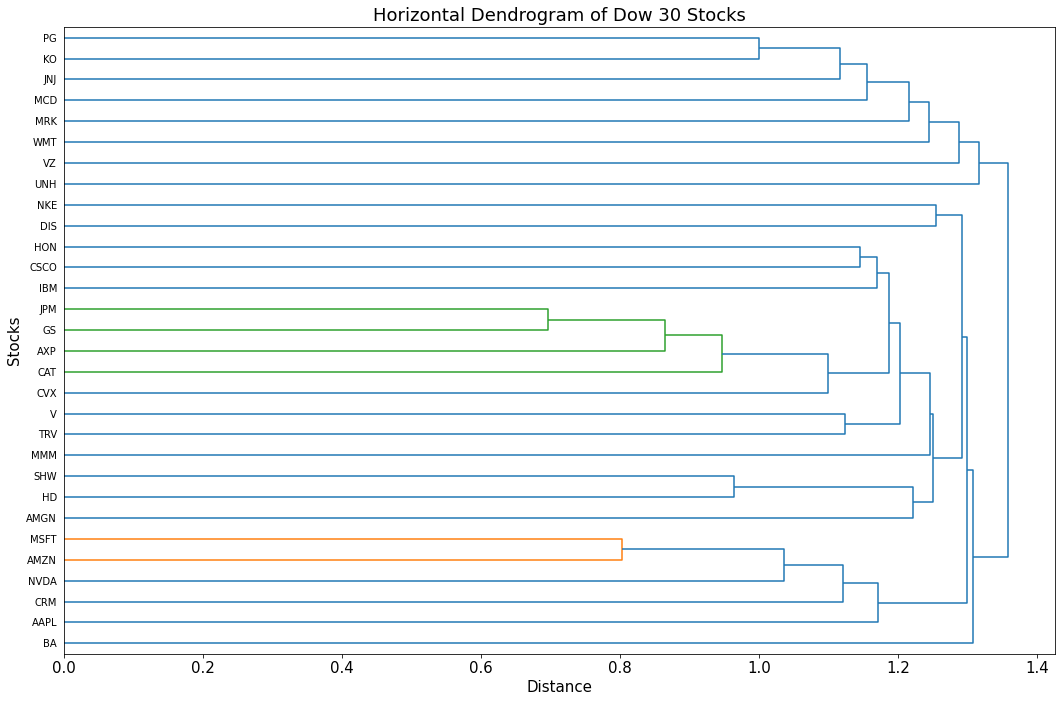

In [103]:
plt.figure(figsize=(15, 10))
dendrogram(
    linkage_matrix,
    orientation='right',  # Horizontal dendrogram
    labels=distance_matrix.index.tolist(),  # Use stock names as labels
    leaf_rotation=0,
    leaf_font_size=10, 
    #color_threshold = 0
)

plt.title('Horizontal Dendrogram of Dow 30 Stocks')
plt.xlabel('Distance')
plt.ylabel('Stocks')
plt.tight_layout()
plt.show()

<h3>3.4</h3>

In [104]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score

In [105]:
titanic = pd.read_csv("titanic3.csv")

In [106]:
print(titanic.head())

   pclass  survived                                             name     sex  \
0       1         1                    Allen, Miss. Elisabeth Walton  female   
1       1         1                   Allison, Master. Hudson Trevor    male   
2       1         0                     Allison, Miss. Helen Loraine  female   
3       1         0             Allison, Mr. Hudson Joshua Creighton    male   
4       1         0  Allison, Mrs. Hudson J C (Bessie Waldo Daniels)  female   

     age  sibsp  parch  ticket      fare    cabin embarked boat   body  \
0  29.00      0      0   24160  211.3375       B5        S    2    NaN   
1   0.92      1      2  113781  151.5500  C22 C26        S   11    NaN   
2   2.00      1      2  113781  151.5500  C22 C26        S  NaN    NaN   
3  30.00      1      2  113781  151.5500  C22 C26        S  NaN  135.0   
4  25.00      1      2  113781  151.5500  C22 C26        S  NaN    NaN   

                         home.dest  
0                     St Louis, MO  


In [107]:
titanic = titanic[["pclass", "survived", "sex", "age"]]

In [108]:
titanic["age"].fillna(titanic["age"].median(), inplace = True)

/var/folders/mv/w58n0t094j1_0td5w0b14jy00000gn/T/ipykernel_27803/2649837275.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  titanic["age"].fillna(titanic["age"].median(), inplace = True)


In [109]:
titanic["sex"] = titanic["sex"].map({"male" : 1, "female" : 0})

In [110]:
print(titanic.head())

   pclass  survived  sex    age
0       1         1    0  29.00
1       1         1    1   0.92
2       1         0    0   2.00
3       1         0    1  30.00
4       1         0    0  25.00


In [111]:
X = titanic.drop(["survived"], axis = 1)
y = titanic["survived"]

In [112]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

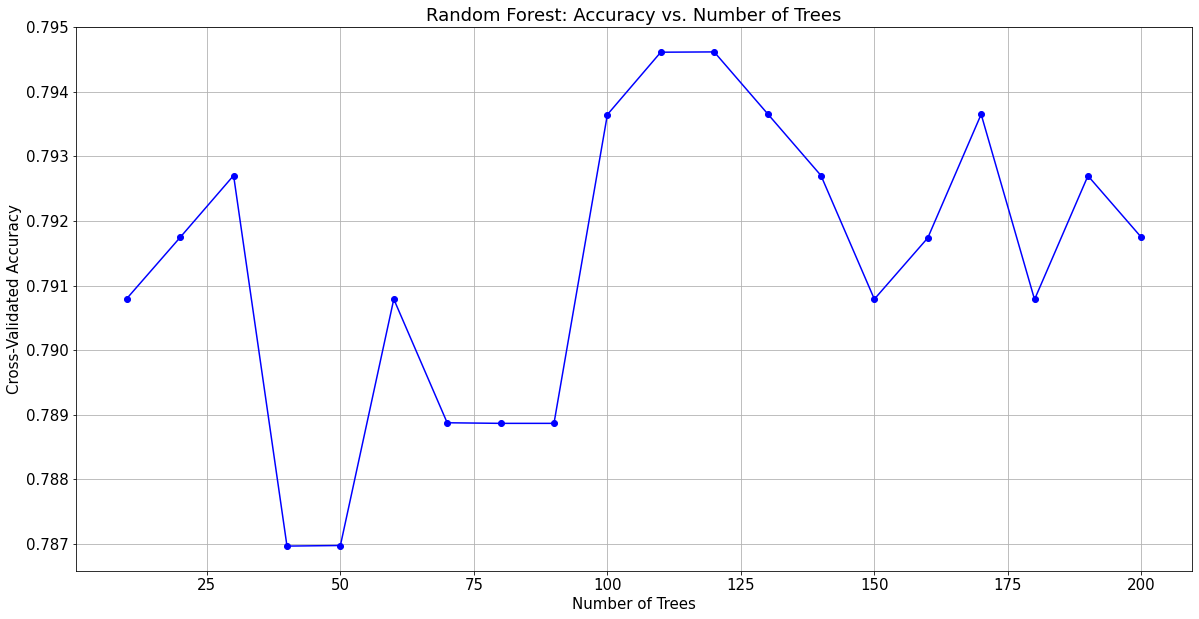

In [113]:
n_estimators_range = range(10, 201, 10)
accuracies = []

for n_estimators in n_estimators_range:
    rf = RandomForestClassifier(n_estimators=n_estimators, random_state=42)
    cv_scores = cross_val_score(rf, X_train, y_train, cv=5, scoring='accuracy')
    accuracies.append(np.mean(cv_scores))

# Plot accuracy vs. number of trees
plt.figure(figsize=(20, 10))
plt.plot(n_estimators_range, accuracies, marker='o', color = "blue")
plt.title('Random Forest: Accuracy vs. Number of Trees')
plt.xlabel('Number of Trees')
plt.ylabel('Cross-Validated Accuracy')
plt.grid()
plt.show()

In [114]:
optimal_n_estimators = n_estimators_range[np.argmax(accuracies)]
print(f"Optimal number of trees: {optimal_n_estimators}")

Optimal number of trees: 120


In [115]:
rf_final = RandomForestClassifier(n_estimators=optimal_n_estimators, random_state=42)
rf_final.fit(X_train, y_train)

RandomForestClassifier(n_estimators=120, random_state=42)

In [116]:
y_pred = rf_final.predict(X_test)
test_accuracy = accuracy_score(y_test, y_pred)
print(f"Test Accuracy with {optimal_n_estimators} trees: {test_accuracy:.4f}")

Test Accuracy with 120 trees: 0.7405


<h3>3.5</h3>

In [117]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import StratifiedKFold, cross_val_score, GridSearchCV
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.preprocessing import StandardScaler

In [118]:
def evaluate_logistic_regression(X_train, X_test, y_train, y_test):
    # Define a range of regularization constants (C values)
    C_values = np.logspace(-3, 3, 20)  # C values from 0.001 to 1000
    accuracies = []

    # Perform cross-validation for each value of C
    for C in C_values:
        
        lr = LogisticRegression(C=C, random_state = 42)
        cv_scores = cross_val_score(lr, X_train, y_train, cv = 5, scoring='accuracy')
        accuracies.append(np.mean(cv_scores))

    # Find the optimal C value
    optimal_C = C_values[np.argmax(accuracies)]
    print(f"Optimal Regularization Constant (C): {optimal_C}")

    # Train logistic regression with the optimal C
    best_lr = LogisticRegression(C = optimal_C, random_state=42)
    best_lr.fit(X_train, y_train)

    # Predict probabilities on the test set
    lr_probs = best_lr.predict_proba(X_test)[:, 1]

    # Compute ROC curve and AUC
    fpr, tpr, _ = roc_curve(y_test, lr_probs)
    roc_auc = auc(fpr, tpr)

    # Plot accuracy vs. regularization constant
    plt.figure(figsize=(20, 10))
    plt.plot(C_values, accuracies, marker='o', color = "blue")
    plt.xscale('log')  # Logarithmic scale for C
    plt.title('Logistic Regression: Accuracy vs. Regularization Constant')
    plt.xlabel('Regularization Constant (C)')
    plt.ylabel('Cross-Validated Accuracy')
    plt.grid()
    plt.show()

    return fpr, tpr, roc_auc

In [119]:
def evaluate_random_forest(X_train, X_test, y_train, y_test):
    n_estimators_range = range(1, 51, 1)  # Define range of n_estimators
    accuracies = []

    # Perform cross-validation for each value of n_estimators
    for n_estimators in n_estimators_range:
        
        rf = RandomForestClassifier(n_estimators=n_estimators, random_state=42)
        cv_scores = cross_val_score(rf, X_train, y_train, cv=5, scoring = 'accuracy')
        accuracies.append(np.mean(cv_scores))

    # Find the number of trees with the best accuracy
    optimal_n_estimators = n_estimators_range[np.argmax(accuracies)]
    print(f"Optimal number of trees: {optimal_n_estimators}")

    # Train Random Forest with the optimal number of trees
    best_rf = RandomForestClassifier(n_estimators = optimal_n_estimators, random_state=42)
    best_rf.fit(X_train, y_train)

    # Predict probabilities on the test set
    rf_probs = best_rf.predict_proba(X_test)[:, 1]

    # Compute ROC curve and AUC
    fpr, tpr, _ = roc_curve(y_test, rf_probs)
    roc_auc = auc(fpr, tpr)

    # Plot accuracy vs. number of trees
    plt.figure(figsize=(20, 10))
    plt.plot(n_estimators_range, accuracies, marker='o', color = "blue")
    plt.title('Random Forest: Accuracy vs. Number of Trees')
    plt.xlabel('Number of Trees')
    plt.ylabel('Cross-Validated Accuracy')
    plt.grid()
    plt.show()

    return fpr, tpr, roc_auc

In [120]:
def evaluate_decision_tree(X_train, X_test, y_train, y_test):
    # Define range of max_depth values
    max_depth_values = range(1, 31, 1)
    accuracies = []

    # Perform cross-validation for each value of max_depth
    for max_depth in max_depth_values:
        
        dt = DecisionTreeClassifier(max_depth=max_depth, random_state=42)
        cv_scores = cross_val_score(dt, X_train, y_train, cv=5, scoring='accuracy')
        accuracies.append(np.mean(cv_scores))

    # Find the optimal max_depth
    optimal_max_depth = max_depth_values[np.argmax(accuracies)]
    print(f"Optimal max_depth: {optimal_max_depth}")

    # Train Decision Tree with the optimal max_depth
    best_dt = DecisionTreeClassifier(max_depth=optimal_max_depth, random_state=42)
    best_dt.fit(X_train, y_train)

    # Predict probabilities on the test set
    dt_probs = best_dt.predict_proba(X_test)[:, 1]

    # Compute ROC curve and AUC
    fpr, tpr, _ = roc_curve(y_test, dt_probs)
    roc_auc = auc(fpr, tpr)

    # Plot accuracy vs. max_depth
    plt.figure(figsize=(20, 10))
    plt.plot([str(md) for md in max_depth_values], accuracies, marker='o', color = "blue")
    plt.title('Decision Tree: Accuracy vs. max_depth')
    plt.xlabel('max_depth')
    plt.ylabel('Cross-Validated Accuracy')
    plt.grid()
    plt.show()

    return fpr, tpr, roc_auc

In [121]:
def evaluate_knn(X_train, X_test, y_train, y_test):
    # Define range of n_neighbors values
    n_neighbors_values = np.arange(1, 51, 1)
    accuracies = []
    
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    # Perform cross-validation for each value of n_neighbors
    for n_neighbors in n_neighbors_values:
        
        knn = KNeighborsClassifier(n_neighbors = n_neighbors)
        cv_scores = cross_val_score(knn, X_train_scaled, y_train, cv = 5, scoring='accuracy')
        accuracies.append(np.mean(cv_scores))

    # Find the optimal n_neighbors
    optimal_n_neighbors = n_neighbors_values[np.argmax(accuracies)]
    print(f"Optimal n_neighbors: {optimal_n_neighbors}")

    # Train KNN with the optimal n_neighbors
    best_knn = KNeighborsClassifier(n_neighbors = optimal_n_neighbors)
    best_knn.fit(X_train, y_train)

    # Predict probabilities on the test set
    knn_probs = best_knn.predict_proba(X_test)[:, 1]

    # Compute ROC curve and AUC
    fpr, tpr, _ = roc_curve(y_test, knn_probs)
    roc_auc = auc(fpr, tpr)

    # Plot accuracy vs. n_neighbors
    plt.figure(figsize=(20, 10))
    plt.plot(n_neighbors_values, accuracies, marker='o', color = "blue")
    plt.title('KNN: Accuracy vs. n_neighbors')
    plt.xlabel('n_neighbors')
    plt.ylabel('Cross-Validated Accuracy')
    plt.grid()
    plt.show()

    return fpr, tpr, roc_auc

In [122]:
def evaluate_models(X_train, X_test, y_train, y_test):
    lr_fpr, lr_tpr, lr_auc = evaluate_logistic_regression(X_train, X_test, y_train, y_test)
    rf_fpr, rf_tpr, rf_auc = evaluate_random_forest(X_train, X_test, y_train, y_test)
    dt_fpr, dt_tpr, dt_auc = evaluate_decision_tree(X_train, X_test, y_train, y_test)
    knn_fpr, knn_tpr, knn_auc = evaluate_knn(X_train, X_test, y_train, y_test)
    
    # Plot ROC curves
    plt.figure(figsize=(20, 10))
    plt.plot(lr_fpr, lr_tpr, label=f"Logistic Regression (AUC = {lr_auc:.3f})")
    plt.plot(rf_fpr, rf_tpr, label=f"Random Forest (AUC = {rf_auc:.3f})")
    plt.plot(dt_fpr, dt_tpr, label=f"Decision Tree (AUC = {dt_auc:.3f})")
    plt.plot(knn_fpr, knn_tpr, label=f"KNN (AUC = {knn_auc:.3f})")
    plt.plot([0, 1], [0, 1], color="red", linestyle="--", label="")
    
    # Add plot details
    plt.title("ROC Curve Comparison with Optimal Hyperparameters")
    plt.xlabel("False Positive Rate (FPR)")
    plt.ylabel("True Positive Rate (TPR)")
    plt.legend(loc="lower right")
    plt.grid()
    plt.tight_layout()
    plt.show()

Optimal Regularization Constant (C): 0.0379269019073225


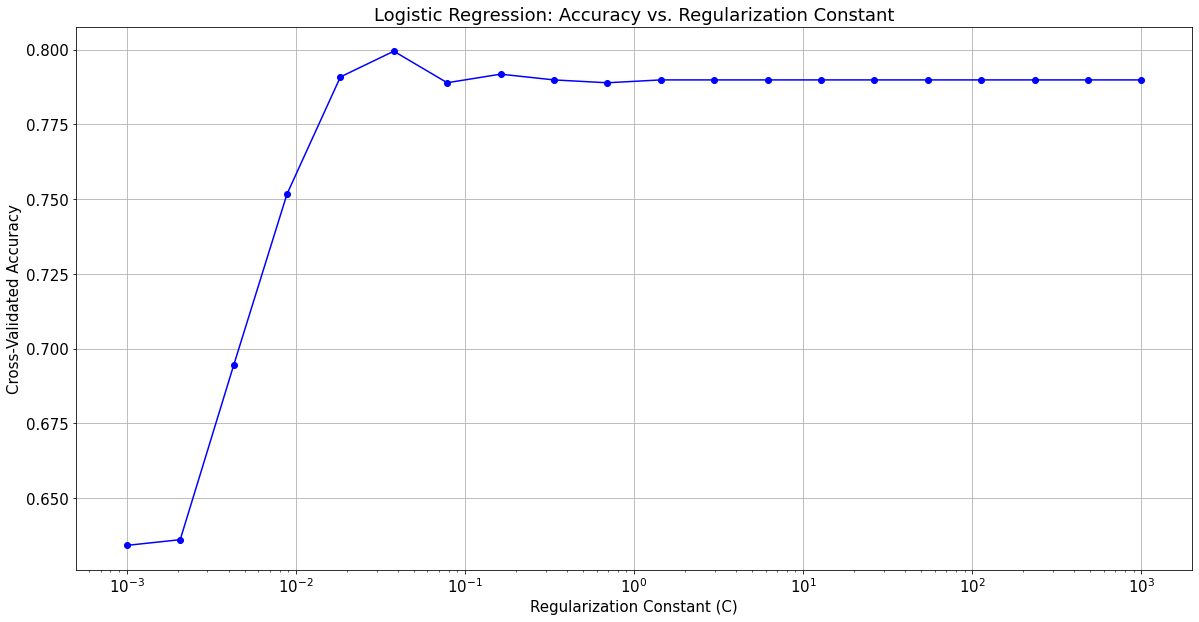

Optimal number of trees: 13


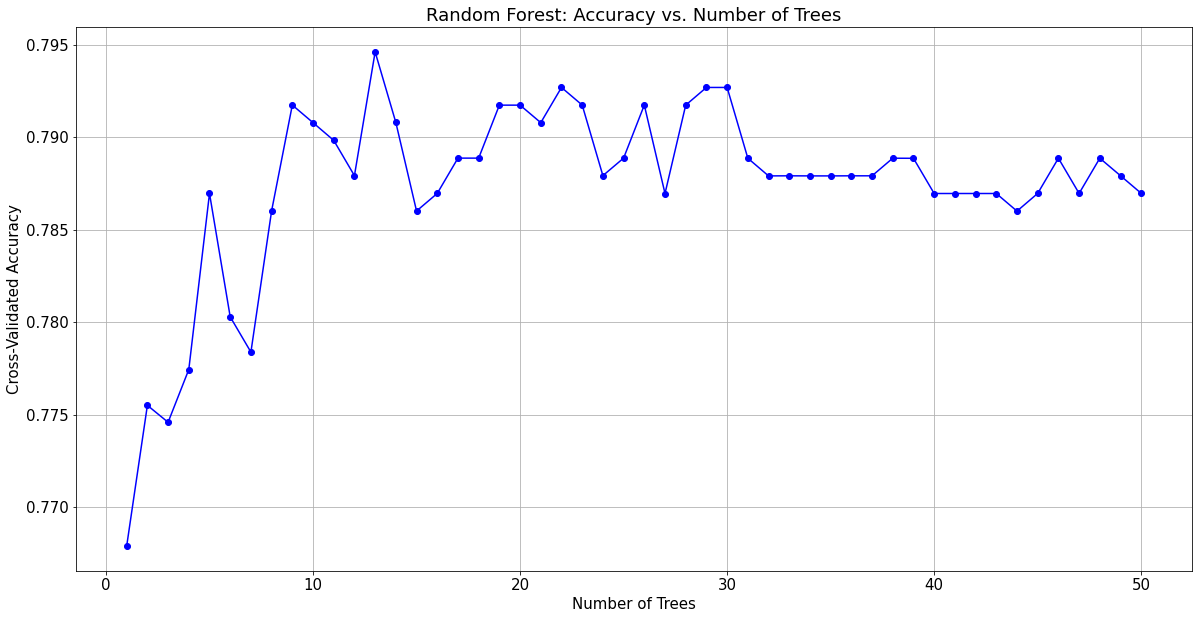

Optimal max_depth: 3


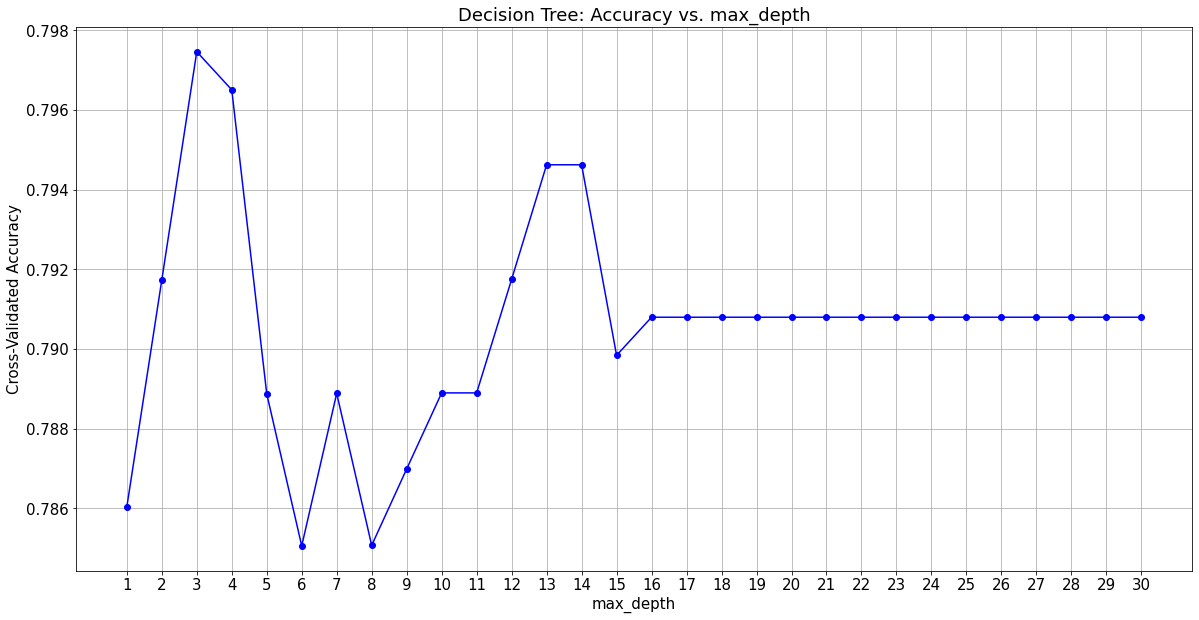

Optimal n_neighbors: 8


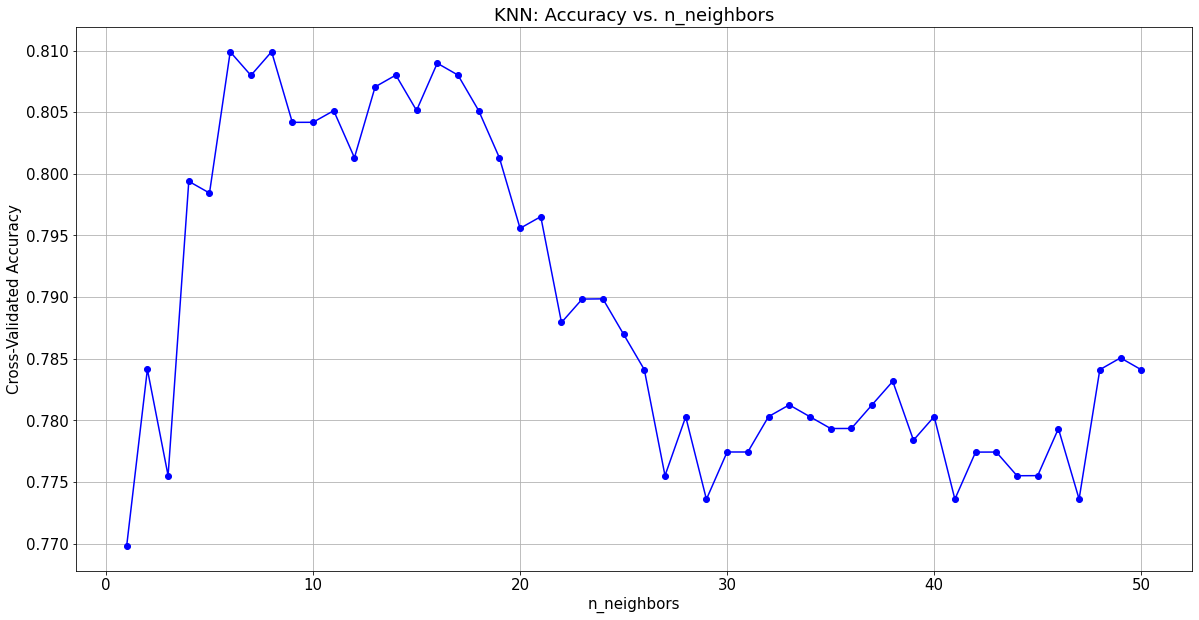

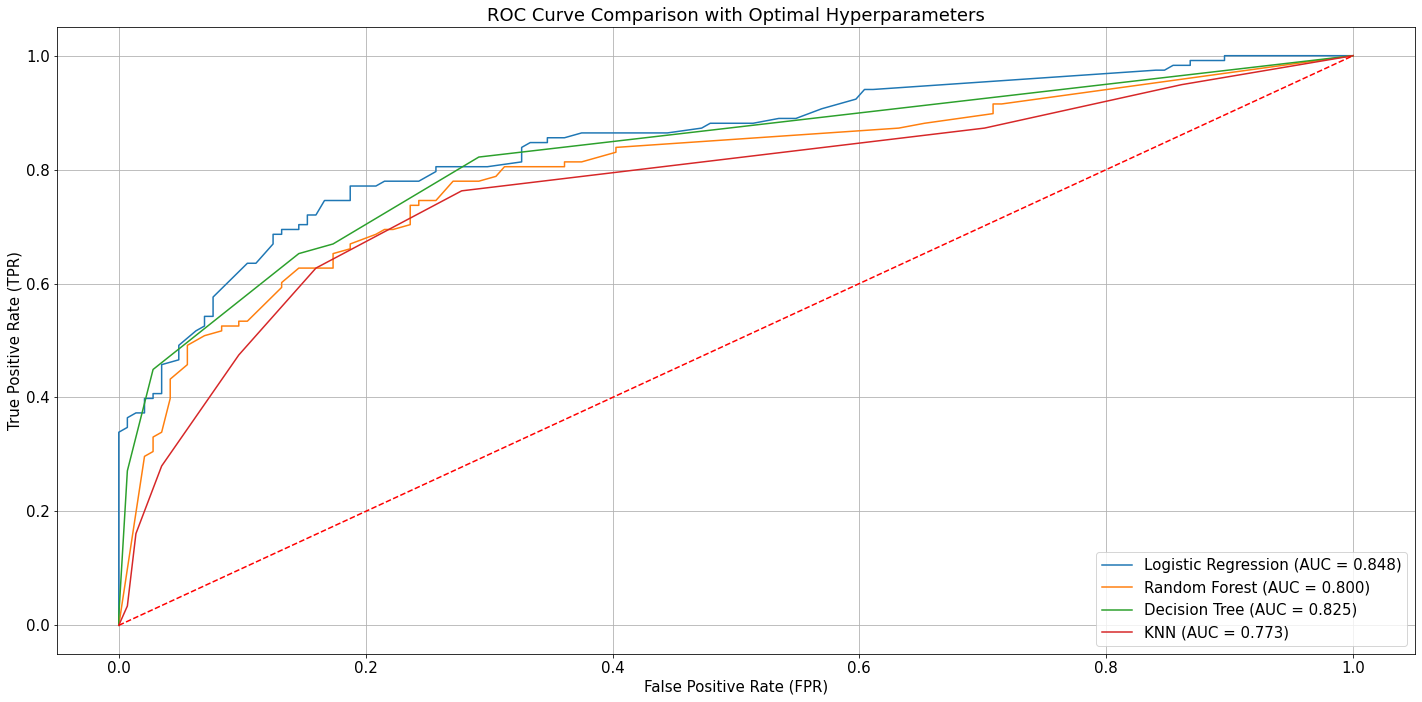

In [123]:
evaluate_models(X_train, X_test, y_train, y_test)

<h3>4.2</h3>

In [124]:
red = pd.read_csv("winequality-red.csv", delimiter = ";")

In [125]:
print(red.head())

   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5 

In [126]:
X = red.drop("quality", axis = 1)
y = red["quality"]

In [127]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [128]:
min_samples_leaf_range = range(1, 51)  # Testing leaf sizes from 1 to 50
accuracies = []

# Perform cross-validation for each value of min_samples_leaf
for min_samples_leaf in min_samples_leaf_range:
    
    rf = RandomForestClassifier(min_samples_leaf = min_samples_leaf, random_state=42)
    cv_scores = cross_val_score(rf, X_train, y_train, cv = 5, scoring="accuracy")
    accuracies.append(np.mean(cv_scores))

# Find the optimal min_samples_leaf
optimal_leaf = min_samples_leaf_range[np.argmax(accuracies)]
print(f"Optimal number of leafs: {optimal_leaf}")

Optimal number of leafs: 2


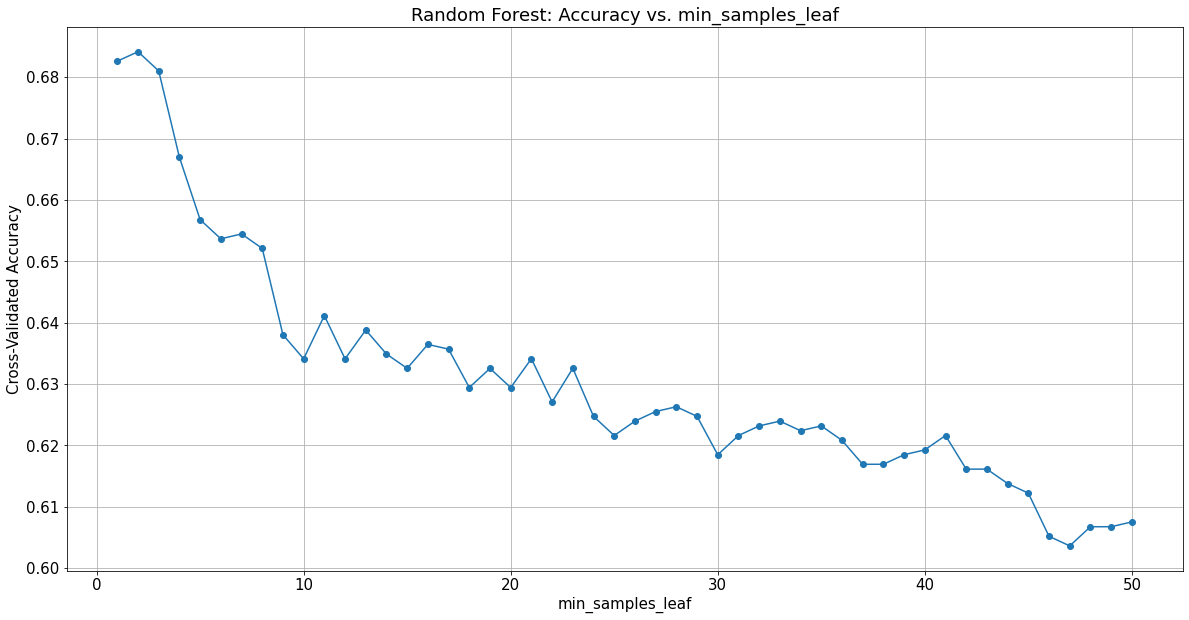

In [129]:
# Plot accuracy vs. min_samples_leaf
plt.figure(figsize=(20, 10))
plt.plot(min_samples_leaf_range, accuracies, marker='o')
plt.title('Random Forest: Accuracy vs. min_samples_leaf')
plt.xlabel('min_samples_leaf')
plt.ylabel('Cross-Validated Accuracy')
plt.grid()
plt.show()

In [130]:
best_rf = RandomForestClassifier(min_samples_leaf=optimal_leaf, random_state=42)
best_rf.fit(X_train, y_train)

# Calculate out-of-sample accuracy on the test set
out_of_sample_accuracy = best_rf.score(X_test, y_test)
print(f"Out-of-Sample Accuracy with optimal min_samples_leaf ({optimal_leaf}): {out_of_sample_accuracy:.4f}")

Out-of-Sample Accuracy with optimal min_samples_leaf (2): 0.6719


<h3>4.3</h3>

Optimal number of trees: 90


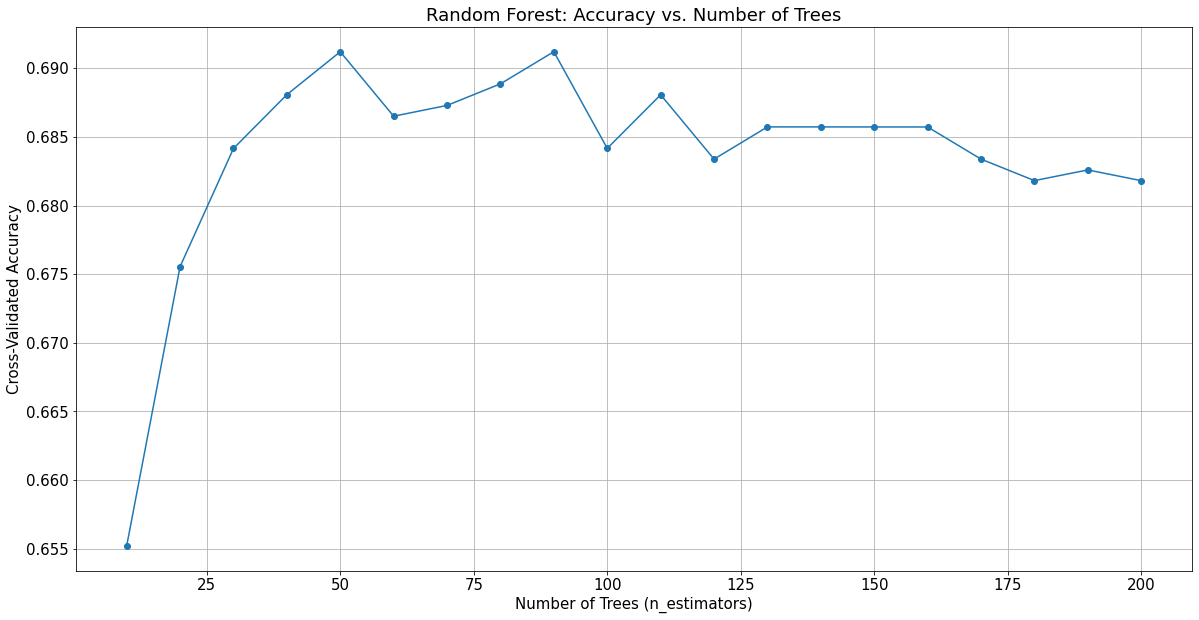

Out-of-Sample Accuracy with optimal min_samples_leaf (2): 0.6750


In [131]:
n_estimators_range = range(10, 201, 10)  # Testing number of trees from 10 to 200
accuracies = []

# Perform cross-validation for each value of n_estimators using the optimal leaf size
for n_estimators in n_estimators_range:
    
    rf = RandomForestClassifier(n_estimators=n_estimators, min_samples_leaf=optimal_leaf, random_state=42)
    cv_scores = cross_val_score(rf, X_train, y_train, cv=5, scoring="accuracy")
    accuracies.append(np.mean(cv_scores))

# Find the optimal number of trees
optimal_trees = n_estimators_range[np.argmax(accuracies)]
print(f"Optimal number of trees: {optimal_trees}")

# Plot accuracy vs. number of trees
plt.figure(figsize=(20, 10))
plt.plot(n_estimators_range, accuracies, marker='o')
plt.title('Random Forest: Accuracy vs. Number of Trees')
plt.xlabel('Number of Trees (n_estimators)')
plt.ylabel('Cross-Validated Accuracy')
plt.grid()
plt.show()

best_rf = RandomForestClassifier(min_samples_leaf=optimal_leaf, n_estimators = optimal_trees, random_state=42)
best_rf.fit(X_train, y_train)

# Calculate out-of-sample accuracy on the test set
out_of_sample_accuracy = best_rf.score(X_test, y_test)
print(f"Out-of-Sample Accuracy with optimal min_samples_leaf ({optimal_leaf}): {out_of_sample_accuracy:.4f}")

<h3>4.4</h3>

<h3>Random Forest</h3>

In [132]:
# Feature importances from Random Forest
rf_importances = best_rf.feature_importances_

print(rf_importances)

[0.07544928 0.10050115 0.07110666 0.06704358 0.07660433 0.06406018
 0.10532764 0.09047871 0.06836713 0.11653818 0.16452315]


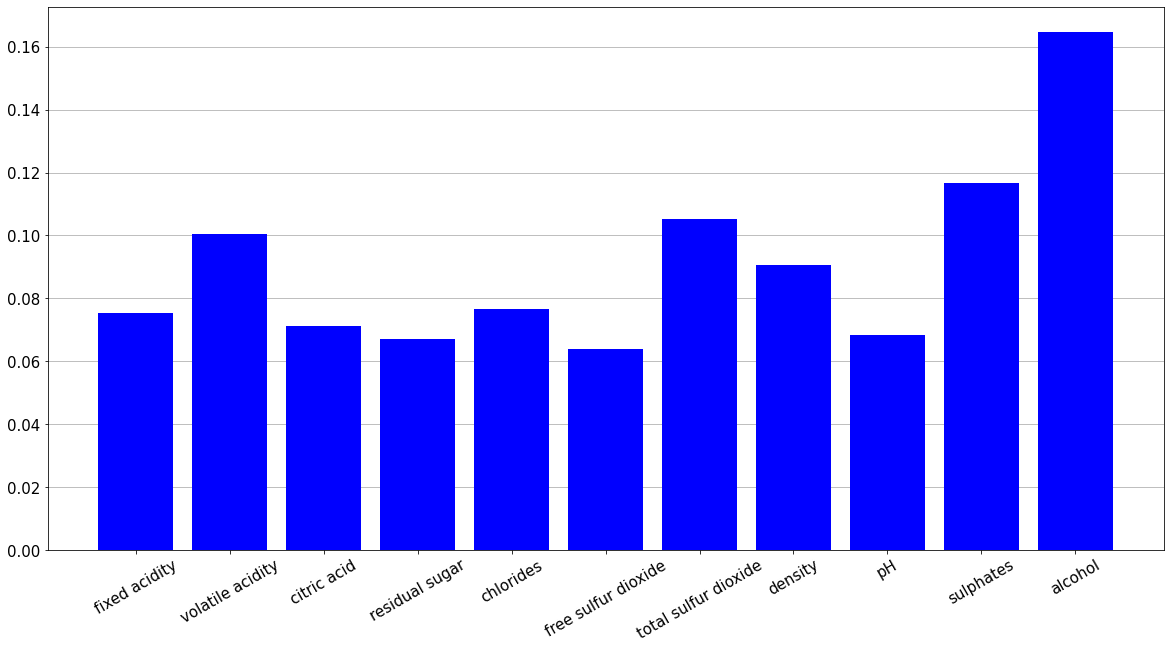

In [133]:
plt.rcParams["font.size"] = 15
plt.figure(figsize = (20, 10))

plt.bar(range(len(rf_importances)), rf_importances,
        color = "blue",
        zorder = 3)

plt.grid(True, zorder = 0, axis = "y")
plt.xticks(range(len(rf_importances)),list(X.columns), rotation = 30)
plt.show()

In [134]:
from sklearn.inspection import permutation_importance

perm_importance = permutation_importance(best_rf, X, y, scoring='accuracy', random_state=42)

# Plot permutation importance
importances = perm_importance.importances_mean
feature_names = X.columns
sorted_idx = importances.argsort()

<h3>Correlation from Assignment 6</h3>

In [135]:
# Correlation with the target variable
corr_importances = list(X.corrwith(y).values)

print(corr_importances)

[np.float64(0.12405164911322426), np.float64(-0.390557780264007), np.float64(0.22637251431804123), np.float64(0.01373163734006629), np.float64(-0.12890655993005262), np.float64(-0.05065605724427629), np.float64(-0.18510028892653776), np.float64(-0.17491922778334887), np.float64(-0.057731391205382156), np.float64(0.2513970790692614), np.float64(0.4761663240011358)]


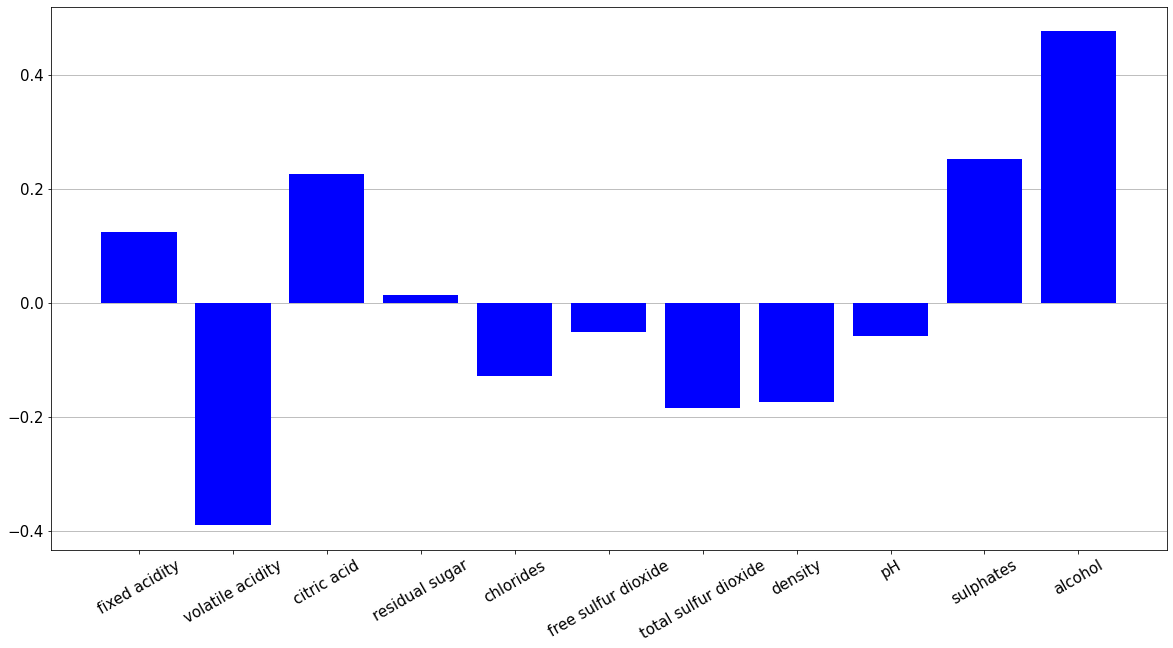

In [136]:
plt.rcParams["font.size"] = 15
plt.figure(figsize = (20, 10))

plt.bar(range(len(corr_importances)), corr_importances,
        color = "blue",
        zorder = 3)

plt.grid(True, zorder = 0, axis = "y")
plt.xticks(range(len(corr_importances)),list(X.columns), rotation = 30)
plt.show()

In [137]:
from sklearn.metrics import mean_squared_error

<h3>LASSO</h3>

In [138]:
from sklearn.linear_model import LassoCV

In [139]:
def evaluate_lasso(X_train, X_test, y_train, y_test):
    # Standardize the data
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Define range of alpha values (regularization strength)
    alpha_values = np.logspace(-4, 1, 50)  # Alpha values from 0.0001 to 10

    # Fit LASSO with cross-validation
    lasso = LassoCV(alphas=alpha_values, cv=5, random_state=42)
    lasso.fit(X_train_scaled, y_train)

    # Extract optimal alpha
    optimal_alpha = lasso.alpha_
    print(f"Optimal alpha (regularization strength): {optimal_alpha}")

    # Extract LASSO coefficients (correlation strengths)
    feature_importances = pd.DataFrame({
        "Feature": X_train.columns,
        "Coefficient": lasso.coef_,
        "Absolute Coefficient": np.abs(lasso.coef_)
    }).sort_values(by="Absolute Coefficient", ascending=False)
    
    mse_path = np.mean(lasso.mse_path_, axis=1)
    
    plt.figure(figsize=(20, 10))
    plt.subplot(1, 2, 1)
    plt.semilogx(lasso.alphas_, mse_path)
    plt.xlabel('Lambda')
    plt.ylabel('Mean Squared Error')
    plt.title('MSE vs. Lambda for Red Wine')

    # coeff vs lambda
    plt.subplot(1, 2, 2)
    alphas, coefs, _ = lasso.path(X, y, alphas=lasso.alphas_)
    plt.semilogx(alphas, coefs.T)
    plt.xlabel('Lambda')
    plt.ylabel('Coefficients')
    plt.title('Coefficients vs. Lambda for Red Wine')
    plt.legend(loc='upper right', bbox_to_anchor=(1.5, 1))

    plt.show()
    
    
    # Plot feature importance (absolute coefficients)
    plt.figure(figsize=(20, 10))
    plt.bar(feature_importances["Feature"], feature_importances["Coefficient"],
            color="blue",
           zorder = 3)
    
    plt.ylabel("Features")
    plt.title("Feature Importance (Correlation Strengths) via LASSO")
    plt.grid(True, axis = "y", zorder = 0)
    plt.xticks(rotation = 30)
    plt.show()

    return feature_importances

Optimal alpha (regularization strength): 0.008685113737513529


/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:683: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 13.201251896131339, tolerance: 5.183400000000001
  model = cd_fast.enet_coordinate_descent_gram(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:683: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 77.82470777842826, tolerance: 5.183400000000001
  model = cd_fast.enet_coordinate_descent_gram(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:683: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 116.99333655020445, tolerance: 5.183400000000001
  model = cd_fast.enet_coordinate_descent_gram(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:683: 

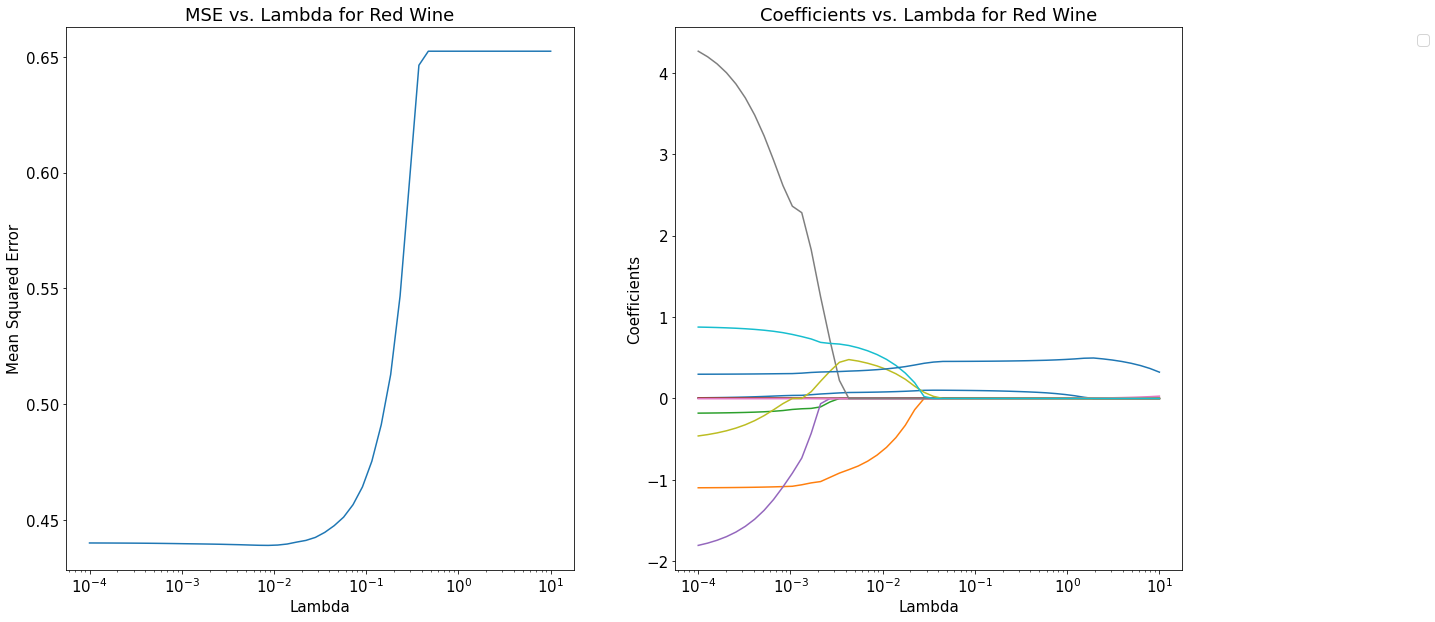

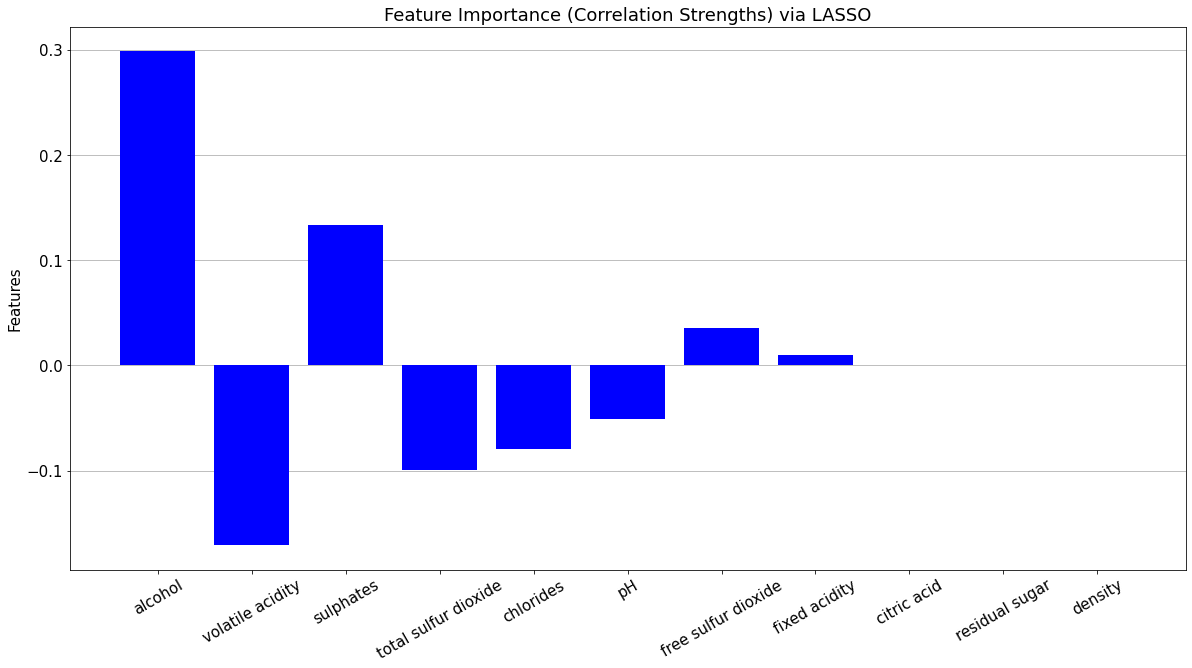

In [140]:
lasso_correlations = evaluate_lasso(X_train, X_test, y_train, y_test)

In [141]:
features = list(X.columns)
print(features)

['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']


In [142]:
print(rf_importances)

[0.07544928 0.10050115 0.07110666 0.06704358 0.07660433 0.06406018
 0.10532764 0.09047871 0.06836713 0.11653818 0.16452315]


In [143]:
print(corr_importances)

[np.float64(0.12405164911322426), np.float64(-0.390557780264007), np.float64(0.22637251431804123), np.float64(0.01373163734006629), np.float64(-0.12890655993005262), np.float64(-0.05065605724427629), np.float64(-0.18510028892653776), np.float64(-0.17491922778334887), np.float64(-0.057731391205382156), np.float64(0.2513970790692614), np.float64(0.4761663240011358)]


In [144]:
lasso_corrs = lasso_correlations["Coefficient"].values
print(lasso_corrs)

[ 0.29864113 -0.17120322  0.13296237 -0.0996003  -0.07982901 -0.05141191
  0.03519241  0.00976109 -0.          0.         -0.        ]


In [145]:
importance_df = pd.DataFrame({
    'Feature': features,
    'Random Forest': rf_importances,
    'Correlation': np.abs(corr_importances),  # Absolute value of correlation
    'LASSO': np.abs(lasso_corrs)  # Absolute value of LASSO coefficients
}).set_index('Feature')

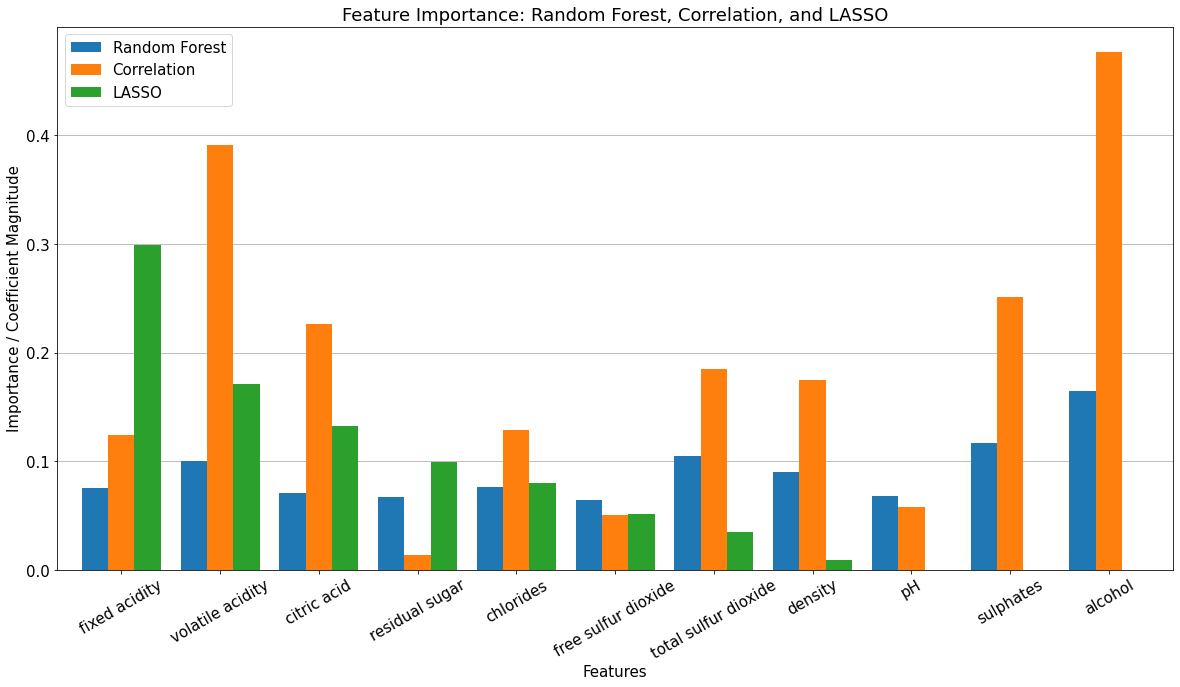

In [146]:
importance_df.plot(kind='bar', figsize=(20, 10), width=0.8, zorder = 3)

plt.title('Feature Importance: Random Forest, Correlation, and LASSO')
plt.ylabel('Importance / Coefficient Magnitude')
plt.xlabel('Features')
plt.grid(True, axis='y', zorder = 0)
plt.xticks(rotation = 30)
#plt.tight_layout()
plt.show()

<h3>4.5</h3>

In [147]:
from sklearn.metrics import mean_squared_error, r2_score

<h3>Random Forest</h3>

In [148]:
rf_preds = best_rf.predict(X_test)
rf_mse = mean_squared_error(y_test, rf_preds)
rf_r2 = r2_score(y_test, rf_preds)

In [149]:
print(f"Random Forest MSE: {rf_mse:.4f}, R²: {rf_r2:.4f}")

Random Forest MSE: 0.3906, R²: 0.4023


<h3>Linear Regression</h3>

In [150]:
from sklearn.linear_model import LinearRegression

In [151]:
lin_reg = LinearRegression()

In [152]:
features_selected_by_lasso = lasso_correlations[lasso_correlations["Coefficient"] != 0]["Feature"].values

In [153]:
lin_reg.fit(X_train[features_selected_by_lasso], y_train)

LinearRegression()

In [154]:
lin_reg_preds = lin_reg.predict(X_test[features_selected_by_lasso])
lin_reg_mse = mean_squared_error(y_test, lin_reg_preds)
lin_reg_r2 = r2_score(y_test, lin_reg_preds)

In [155]:
print(f"Linear Regression MSE: {lin_reg_mse:.4f}, R²: {lin_reg_r2:.4f}")

Linear Regression MSE: 0.3917, R²: 0.4006


<h3>KNN</h3>

In [156]:
def evaluate_knn_assignment_6(X_train, X_test, y_train, y_test):
    # Define range of n_neighbors values
    n_neighbors_values = np.arange(1, 51, 1)
    accuracies = []
    
    # Standardize the data
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    # Perform cross-validation for each value of n_neighbors
    for n_neighbors in n_neighbors_values:
        knn = KNeighborsClassifier(n_neighbors=n_neighbors)
        cv_scores = cross_val_score(knn, X_train_scaled, y_train, cv=5, scoring='accuracy')
        accuracies.append(np.mean(cv_scores))
    
    # Find the optimal n_neighbors
    optimal_n_neighbors = n_neighbors_values[np.argmax(accuracies)]
    print(f"Optimal n_neighbors: {optimal_n_neighbors}")
    
    # Train KNN with the optimal n_neighbors
    best_knn = KNeighborsClassifier(n_neighbors=optimal_n_neighbors)
    best_knn.fit(X_train_scaled, y_train)
    
    # Predict on the test set
    y_pred = best_knn.predict(X_test_scaled)
    
    # Calculate MSE and R²
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print(f"Test Mean Squared Error (MSE): {mse:.4f}")
    print(f"Test R² Score: {r2:.4f}")
    
    # Plot accuracy vs. n_neighbors
    plt.figure(figsize=(12, 6))
    plt.plot(n_neighbors_values, accuracies, marker='o', linestyle='-', color='blue')
    plt.title('KNN: Cross-Validated Accuracy vs. n_neighbors')
    plt.xlabel('Number of Neighbors (n_neighbors)')
    plt.ylabel('Cross-Validated Accuracy')
    plt.grid()
    plt.show()
    
    return X_test_scaled, mse, r2

Optimal n_neighbors: 1
Test Mean Squared Error (MSE): 0.5531
Test R² Score: 0.1536


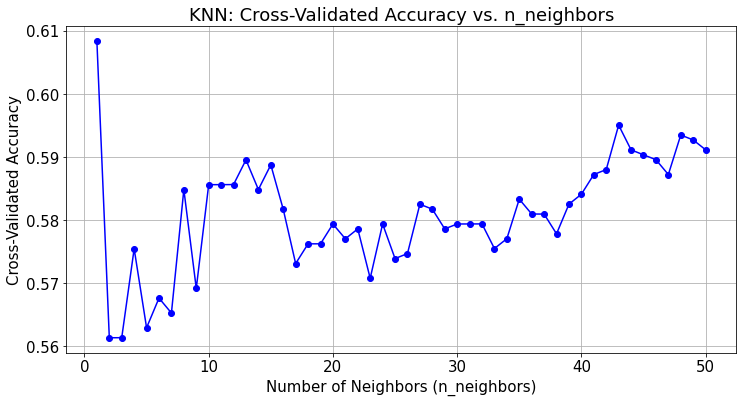

(array([[-3.61859850e-01,  1.64286407e-01, -9.85152962e-01, ...,
         -4.65392578e-01, -1.34389336e-04, -7.77452782e-01],
        [-3.03840702e-01, -1.70525408e-01, -5.24491803e-01, ...,
          5.08915214e-01, -1.03143815e+00, -8.72484283e-01],
        [ 1.37871461e+00,  7.78108067e-01, -2.68568937e-01, ...,
         -2.05577167e-01,  1.83329452e+00, -4.92358280e-01],
        ...,
        [-1.37449586e-02,  3.87494284e-01, -1.15015218e-01, ...,
         -1.04997725e+00, -7.44964886e-01, -5.87389780e-01],
        [ 2.76350785e-01, -1.45397070e+00,  6.01568807e-01, ...,
         -1.04997725e+00,  1.71749571e-01,  7.43051230e-01],
        [ 4.50408230e-01,  1.30822677e+00, -1.18989125e+00, ...,
         -1.40623314e-01, -6.87670232e-01, -6.82421281e-01]]),
 np.float64(0.553125),
 0.15360361033488257)

In [157]:
evaluate_knn_assignment_6(X_train, X_test, y_train, y_test)